## STROKE PREDICTION USING MACHINE LEARNING

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Data Visualization Libraries,
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msv
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from pywaffle import Waffle


# Machine Learning Libraries
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score,f1_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Artificial Neural Network Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

In [2]:
# Import your data
data = pd.read_csv('healthcare-dataset-stroke-data.csv') 

In [3]:
#View the first 5 rows in the dataset
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
# View last 5 rows in the dataset
data.tail()

id  gender   age  hypertension  heart_disease ever_married  \
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0

In [5]:
#get data description
data.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [6]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Indicator(
                mode = "number",
                value = data.shape[0],
                number={'font':{'color': 'purple', 'size':75}},
                delta = {"reference": 400},
                title = {"text": "Rows <br><span style="
                                 "'font-size:0.7em;color:gray'></span>"},
                domain = {'y': [0, 1], 'x': [0, 0.2]}))
fig.add_trace(go.Indicator(
                mode = "number",
                value = data.shape[1],
                number={'font':{'color': 'purple', 'size':75}},
                delta = {"reference": 400},
                title = {"text": "Columns <br><span style="
                                 "'font-size:0.6em;color:gray'></span>"},
                domain = {'y': [0, 0], 'x': [1, 1]}))

In [6]:
# Created a function to get necessary information from the data set in a dataframe
def get_data_info():
    dataset_info = pd.DataFrame(index=data.columns)
    dataset_info['Data_type'] = data.dtypes
    dataset_info['Total Value'] = data.count()
    dataset_info['Null_count'] = data.isnull().sum()
    dataset_info['Unique_count'] = data.nunique()
    return dataset_info

In [7]:
get_data_info()

Data_type  Total Value  Null_count  Unique_count
id                    int64         5110           0          5110
gender               object         5110           0             3
age                 float64         5110           0           104
hypertension          int64         5110           0             2
heart_disease         int64         5110           0             2
ever_married         object         5110           0             2
work_type            object         5110           0             5
Residence_type       object         5110           0             2
avg_glucose_level   float64         5110           0          3979
bmi                 float64         4909         201           418
smoking_status       object         5110           0             4
stroke                int64         5110           0             2

It is now easy to view missing data in all fields, their unique values and datatypes. 

As seen above, the dataset only has missing values in the BMI column. Let's visualize that.

### DATA CLEANING

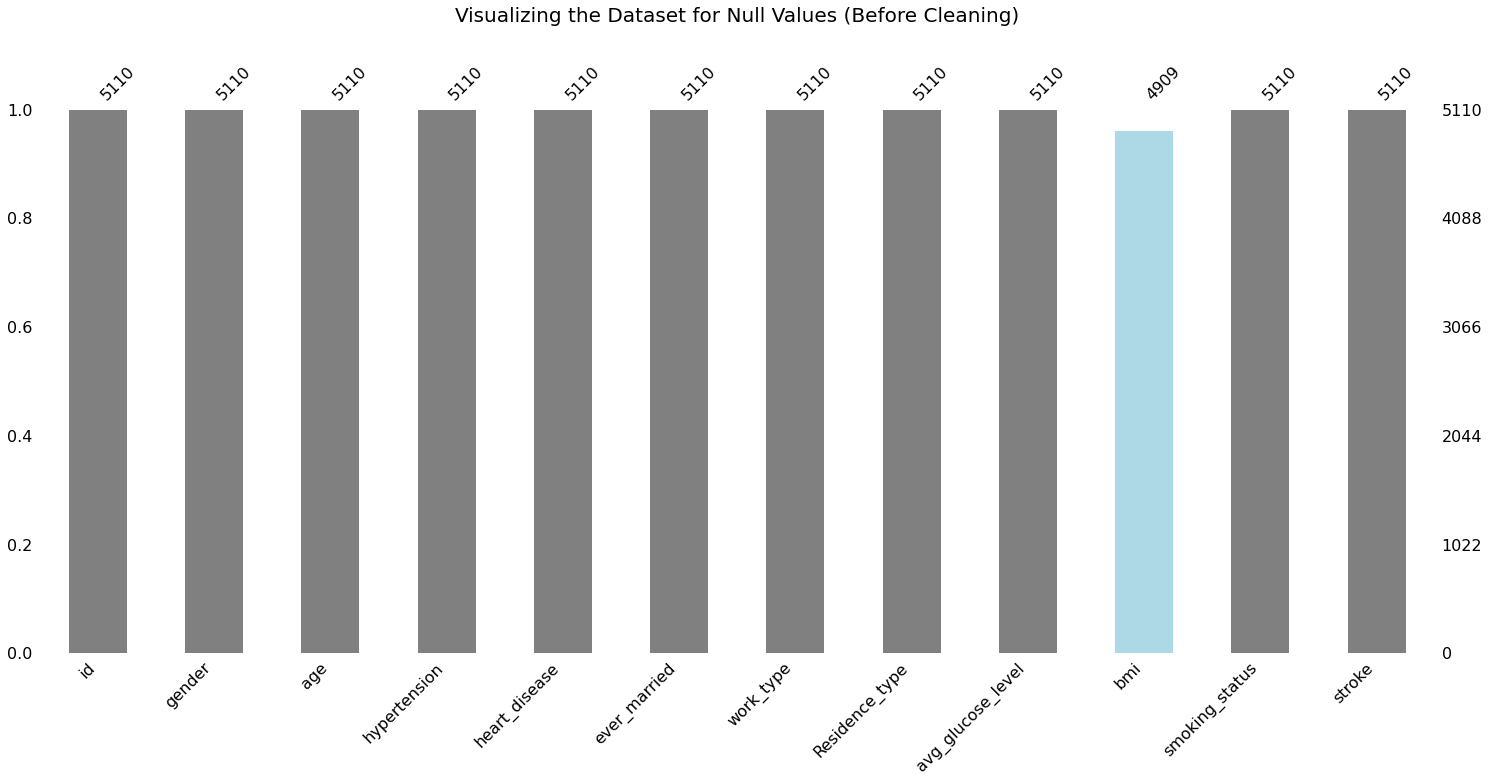

In [8]:
MissingValuesColors = []

for i in data.columns:
    if data[i].isna().sum() != 0:
        MissingValuesColors.append('lightblue')
    else:
        MissingValuesColors.append('gray')

msv.bar(data, color=MissingValuesColors)
plt.title('Visualizing the Dataset for Null Values (Before Cleaning)', size=20, y=1.15)
plt.savefig("Visualizations\DataFrameDirty.png")
plt.show()

In [9]:
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [10]:
# Drop the others category because it is too small to consider. 

In [11]:
#Drop row with others gender. 
data = data[data.gender != 'Other']

In [12]:
#Drop the missing values because the values are less than 5% of the total value
data = data.dropna()

In [13]:
get_data_info()

Data_type  Total Value  Null_count  Unique_count
id                    int64         4908           0          4908
gender               object         4908           0             2
age                 float64         4908           0           104
hypertension          int64         4908           0             2
heart_disease         int64         4908           0             2
ever_married         object         4908           0             2
work_type            object         4908           0             5
Residence_type       object         4908           0             2
avg_glucose_level   float64         4908           0          3851
bmi                 float64         4908           0           418
smoking_status       object         4908           0             4
stroke                int64         4908           0             2

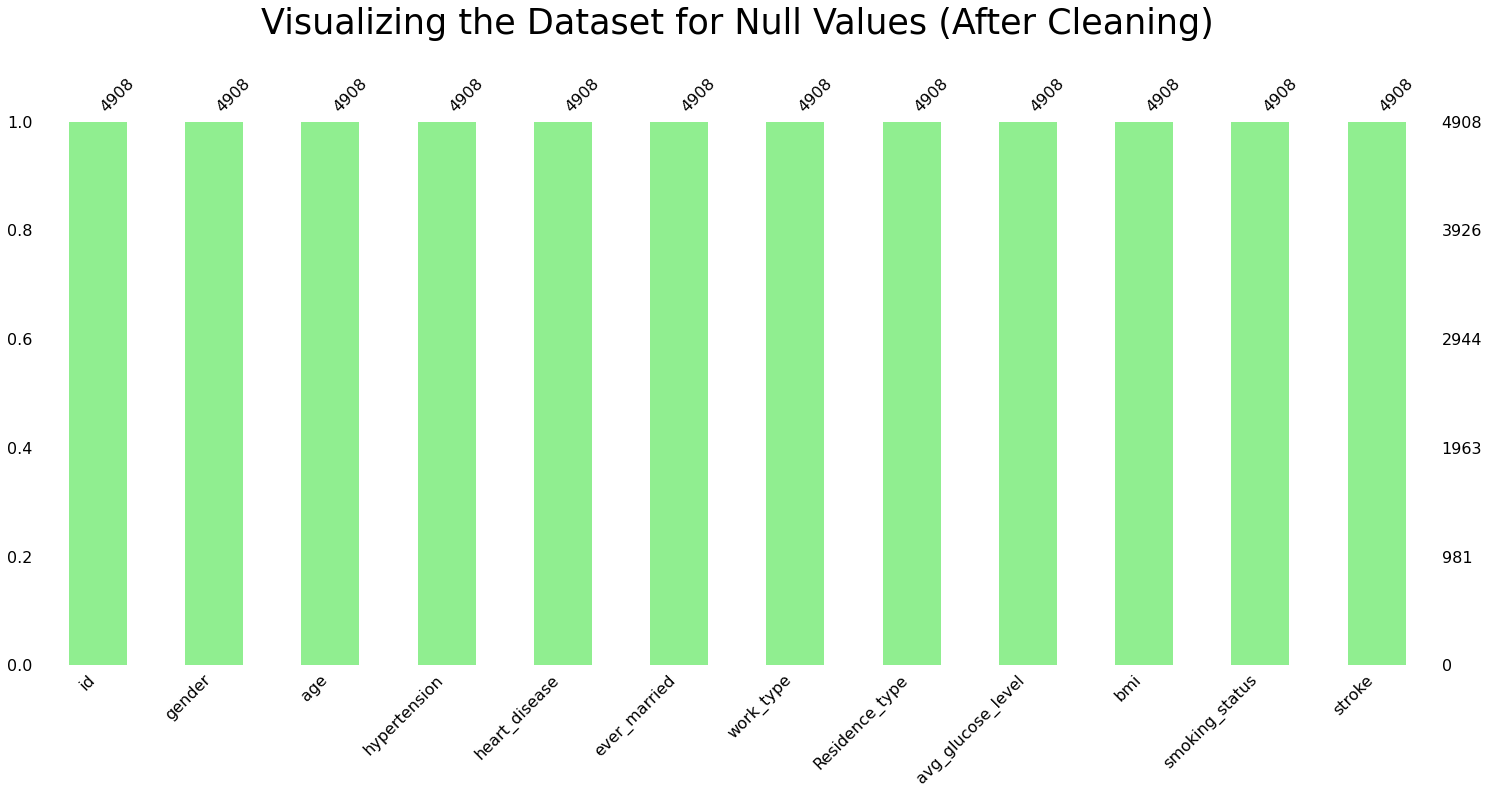

In [14]:
MissingValuesColors = []

for i in data.columns:
    if data[i].isna().sum() != 0:
        MissingValuesColors.append('lightblue')
    else:
        MissingValuesColors.append('lightgreen')

msv.bar(data, color=MissingValuesColors)
plt.title('Visualizing the Dataset for Null Values (After Cleaning)', size=35, y=1.15)
plt.savefig("Visualizations\DataframeCleaned.png")
plt.show()

We have successfully removed all NA values.

In [15]:
# Age is seen as a float instead of Int, hence
# Convert Age to int
data['age'] = data['age'].astype(int)
get_data_info()

Data_type  Total Value  Null_count  Unique_count
id                    int64         4908           0          4908
gender               object         4908           0             2
age                   int32         4908           0            83
hypertension          int64         4908           0             2
heart_disease         int64         4908           0             2
ever_married         object         4908           0             2
work_type            object         4908           0             5
Residence_type       object         4908           0             2
avg_glucose_level   float64         4908           0          3851
bmi                 float64         4908           0           418
smoking_status       object         4908           0             4
stroke                int64         4908           0             2

##       DATA VISUALIZATION

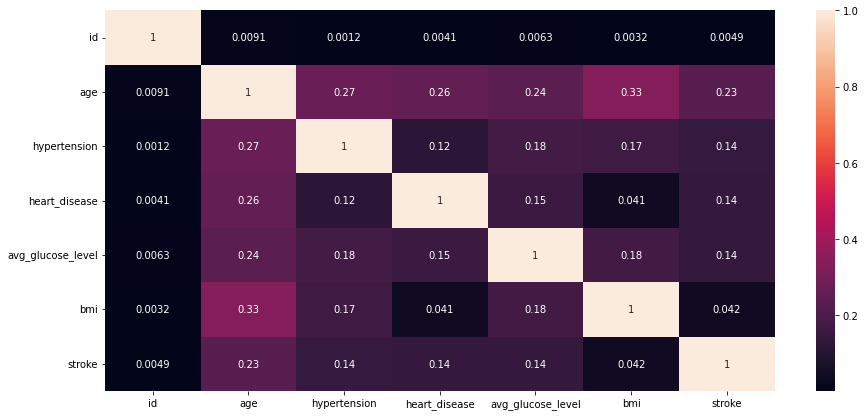

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.savefig("Visualizations\heatmap.png")
plt.show()

In [17]:
#From the Dataset, Let's calculate the percentage of peoople that have stroke and do not have stroke
data.stroke.value_counts()

0    4699
1     209
Name: stroke, dtype: int64

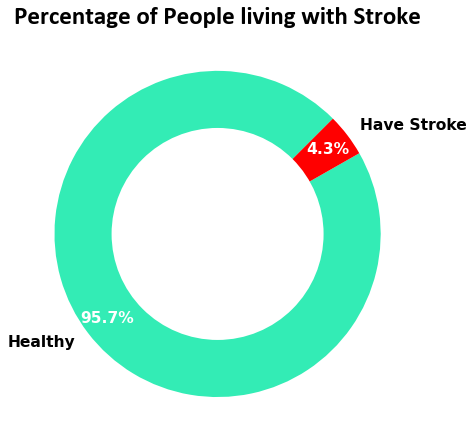

In [18]:
palette2 = ['#33ECB5','#ff0000']

colors = ('#E2F11C','#E3460A')
plt.figure(figsize=(10,7.5))
label = ['Healthy','Have Stroke']
patches, texts, pcts = plt.pie(data.stroke.value_counts(),
                               labels=label,
                               colors=[palette2[0],'#ff0000'],
                               pctdistance=0.85,
                               shadow=False,
                               startangle=45,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 15.5,
                                          'weight': 'bold'
                                          })
plt.setp(pcts, color='white')

hfont = {'fontname':'calibri', 'weight': 'bold'}
plt.title('Percentage of People living with Stroke', size=25, **hfont)

centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig("Visualizations\PieChart.png")
plt.show()

In [19]:
GenderGroupWithoutStroke = data.groupby(['gender','stroke']).count()['id'][[0,2]]
GenderGroupWithoutStroke

gender  stroke
Female  0         2777
Male    0         1922
Name: id, dtype: int64

In [20]:
GenderGroupWithStroke = data.groupby(['gender','stroke']).count()['id'][[1,3]]
GenderGroupWithStroke

gender  stroke
Female  1         120
Male    1          89
Name: id, dtype: int64

### Assumption 1: MALE ARE MORE SUSCEPTIBLE TO STROKE DUE TO HIGH WORK RELATED STRESS

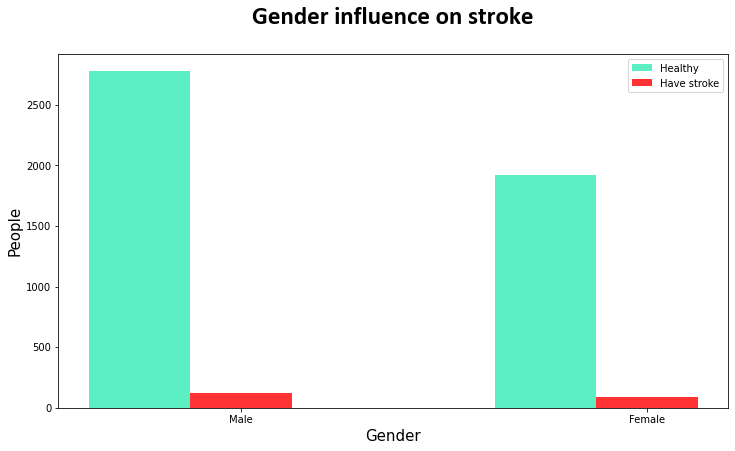

In [21]:
n_groups = 2

# create plot
plt.figure(figsize=(12,6.5))
indexx = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(indexx, GenderGroupWithoutStroke, bar_width,
alpha=opacity,
color= palette2[0],
label='Healthy')

rects2 = plt.bar(indexx + bar_width, GenderGroupWithStroke, bar_width,
alpha=opacity,
color='#ff0000',
label='Have stroke')

plt.xlabel('Gender', size=15)
plt.ylabel('People',size=15)
plt.title('Gender influence on stroke\n',size=25, **hfont)
plt.xticks(indexx + bar_width, ('Male', 'Female'))
plt.legend()
plt.savefig("Visualizations\GenderInfluence.png")
plt.show()

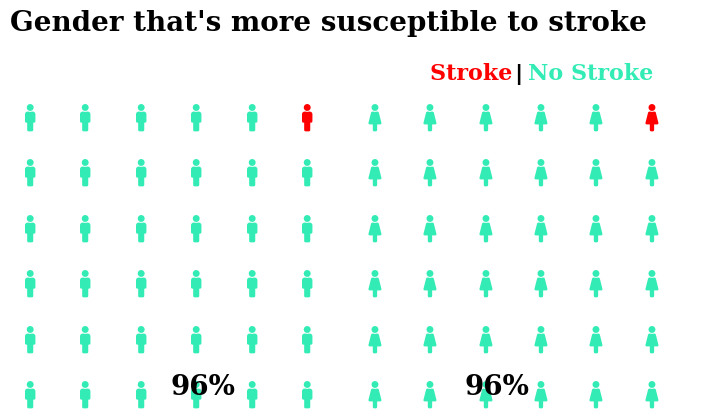

In [22]:
#Let's visualize the data by finding the percentage of people living with stroke and without stroke based on gender
stroke_gen = data[data['stroke'] == 1]['gender'].value_counts()
healthy_gen = data[data['stroke'] == 0]['gender'].value_counts()

female = data['gender'].value_counts().values[0]
male =  data['gender'].value_counts().values[1]

stroke_female = int(round (stroke_gen.values[0] / female * 100, 0))
stroke_male = int(round( stroke_gen.values[1] / male *100, 0))
healthy_female = int(round(healthy_gen.values[0] / female * 100, 0))
healthy_male = int(round(healthy_gen.values[1] / male *100, 0))

female_per = int(round(female/(female+male) * 100, 0))
male_per = int(round(male/(female+male)* 100, 0))

fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#fff',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':6,
                           'columns': 6,
                           'values' : [healthy_male,stroke_male],
                            'colors' : [palette2[0],'#ff0000'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'male',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          '122' :
                          { 
                            'rows': 6,
                            'columns':6,
                            'values':[healthy_female,stroke_female],         
                              'colors' : [palette2[0],'#ff0000'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'female',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)
fig.text(0., 0.8, "Gender that's more susceptible to stroke", {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0.23, 0.28, '{}%'.format(healthy_male), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#000000'},alpha = 1,)
fig.text(0.65, 0.28, '{}%'.format(healthy_female), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#000000'}, alpha = 1)
fig.text(0.6,0.73, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#ff0000'})
fig.text(0.72,0.73, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(0.74,0.73, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':palette2[0]},alpha = 1)
plt.savefig("Visualizations\GenderProportion.png")
fig.show()

<h3 style='color:#ff0000;font-family:cursive'><i class='fa fa-info'></i> From the above diagram, it shows that the assumption is wrong. Being a male doesn't mean you're more susceptible to stroke. </h3>

### <i class='fa fa-question'> </i> Question 1) DOES AGE HAVE AN IMPACT ON STROKE? 

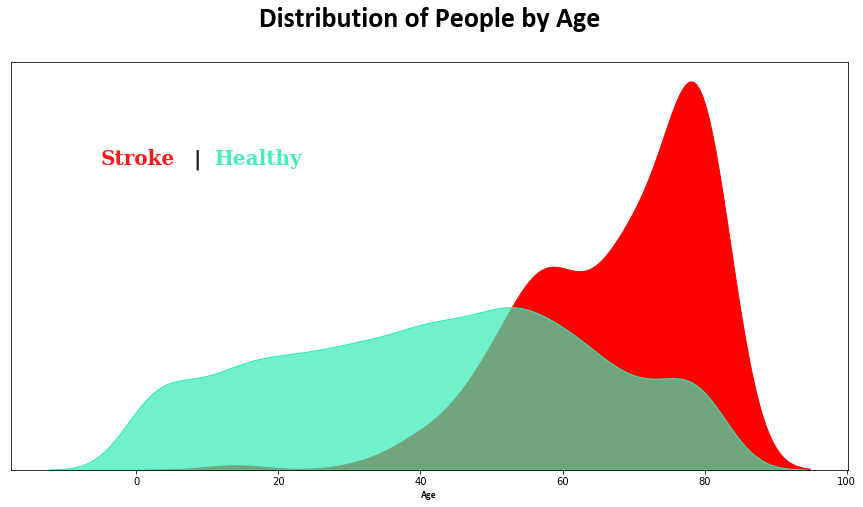

In [23]:
fig = plt.figure(figsize=(15, 7.5))
ax = fig.add_subplot(111)
plt.title('Distribution of People by Age\n', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(-5, 0.03, 'Stroke', {'font': 'Serif',
                             'size': '20',
                             'weight': 'bold',
                             'color': '#ff0000'}, alpha=0.9)

ax.text(8, 0.03, '|', {'font': 'Serif',
                       'size': '20',
                       'weight': 'bold',
                       'color': 'black'}, alpha=0.9)

ax.text(11, 0.03, 'Healthy', {'font': 'Serif',
                              'size': '20',
                              'weight': 'bold',
                              'color': palette2[0]}, alpha=0.9)

sns.kdeplot(data=data[data.stroke == 1],
            x='age', shade=True, ax=ax, color='#ff0000', alpha=1)
sns.kdeplot(data=data[data.stroke == 0],
            x='age', shade=True, ax=ax, color=palette2[0], alpha=0.7)
plt.xlabel('Age', **hfont)
plt.savefig("Visualizations\DistributionOfPeopleByAge.png")
plt.show()

In [24]:
#Categorizing my BMI, Age and Glucose Columns into categorical values using range.
#Categories used
#Age: 0-12   :  Children,    BMI: 0-18  : Underweight       GlucoseLevel:   0-89      : Low
#     13-17  :  Teens,            19-24 : Ideal                             90-159    : Normal
#     18-44  :  Adults            25-30 : Overweight                        160-229   : High
#     45-59  :  Mid Adults        30-50 : Obesity                           230-500   : Very High
#     60-150 :  Elderly

data['bmi_cat'] = pd.cut(data['bmi'], bins = [0, 19, 25,30,50], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
data['age_cat'] = pd.cut(data['age'], bins = [0,13,18, 45,60,150], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
data['glucose_cat'] = pd.cut(data['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

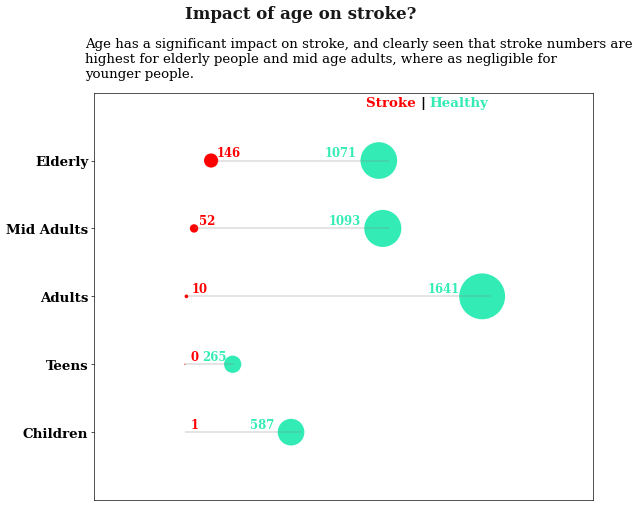

In [25]:
# Using the Categories created above, Let's Visualize those that have Stroke with the Age Category using a dumbell plot

fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax1 = fig.add_subplot(gs[1:10,13:]) #dumbbell plot
stroke_age = data[data['stroke'] == 1].age_cat.value_counts()
healthy_age = data[data['stroke'] == 0].age_cat.value_counts()

ax1.hlines(y = ['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'], xmin = [644,270,1691,1129,1127], 
          xmax = [1,1,11,59,177], color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = stroke_age.index, x = stroke_age.values, s = stroke_age.values*2, color = '#ff0000', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_age.index, x = healthy_age.values, s = healthy_age.values*2, color = palette2[0], ax= ax1, alpha = 1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 2250)
ax1.set_ylim(ymin = -1,ymax = 5)

ax1.set_yticklabels( labels = ['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(0,5.8, 'Impact of age on stroke? \n' ,{'font': 'Serif', 'Size': '20','weight':'bold', 'color':'black'},alpha = 0.9)
ax1.text(1000,4.8, '\nStroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#ff0000'})
ax1.text(1300,4.8, '\n|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1350,4.8, '\nHealthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':palette2[0]})
ax1.text(-550,5., 'Age has a significant impact on stroke, and clearly seen that stroke numbers are \nhighest for elderly people and mid age adults, where as negligible for \nyounger people.\n', 
        {'font':'Serif', 'size':'16','color': 'black'})

ax1.text(stroke_age.values[0] + 30,4.05, stroke_age.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#ff0000'})
ax1.text(healthy_age.values[2] - 300,4.05, healthy_age.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':palette2[0]})

ax1.text(stroke_age.values[1] + 30,3.05, stroke_age.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#ff0000'})
ax1.text(healthy_age.values[1] - 300,3.05, healthy_age.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':palette2[0]})

ax1.text(stroke_age.values[2] + 30,2.05, stroke_age.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#ff0000'})
ax1.text(healthy_age.values[0] - 300,2.05, healthy_age.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':palette2[0]})

ax1.text(stroke_age.values[4] + 30,1.05, stroke_age.values[4], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#ff0000'})
ax1.text(healthy_age.values[4] - 170,1.05, healthy_age.values[4], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':palette2[0]})

ax1.text(stroke_age.values[3] + 30,0.05, stroke_age.values[3], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#ff0000'})
ax1.text(healthy_age.values[3] - 225,0.05, healthy_age.values[3], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':palette2[0]})
plt.savefig("Visualizations\ImpactofAgeonStroke.png")
plt.show()

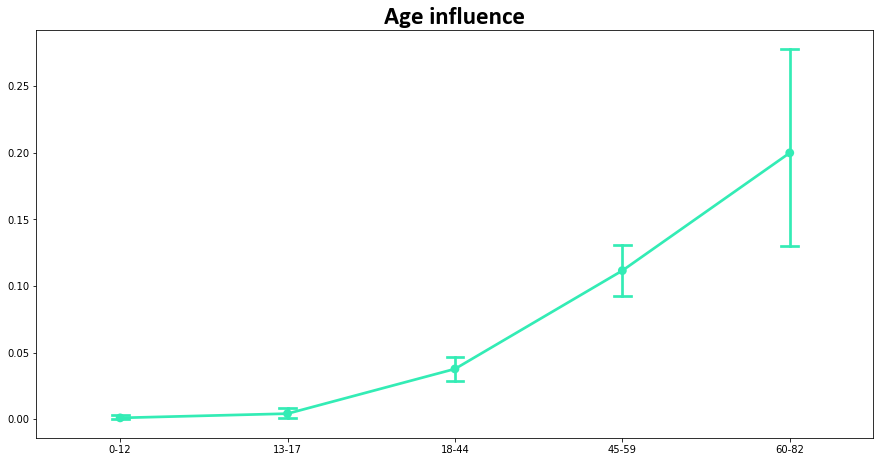

In [26]:
label = ['0-12','13-17','18-44', '45-59',f'60-{round(data.age.max())}']

def plot_age(data, Column_Name):

    AgeData = data[[Column_Name, 'stroke']]
    AgeData[Column_Name] = pd.cut(AgeData[Column_Name],
                               bins=[0, 20, 40, 60, 80, 100],
                               labels=label)

    color = np.random.choice(palette2, 1)[0]
    plt.figure(figsize=(15, 7.5))
    plot = sns.pointplot(x=Column_Name, y='stroke',
                  dodge=0.1, capsize=.1, data=AgeData, color=color)
    plot.set_title(f'Age influence', fontsize=25, **hfont)
    plot.set(xlabel=None, ylabel=None)
    plt.savefig("Visualizations\AgeInfluence.png")
    plt.show()
plot_age(data, 'age')

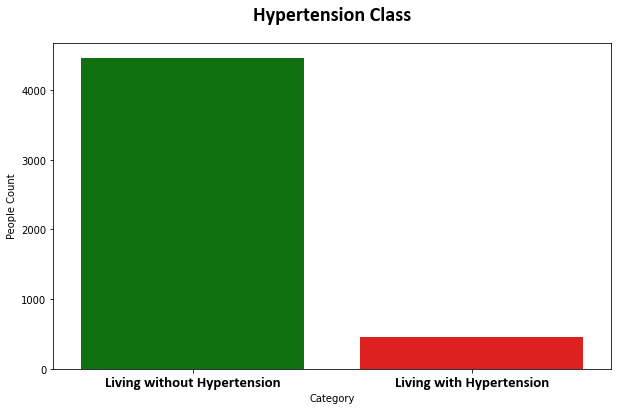

In [27]:
plt.figure(figsize=(10, 6))
HypertensiveDistribution = sns.countplot(x=data.hypertension,palette=(['green','red']))
HypertensiveDistribution.set_title('Hypertension Class',fontsize=20, y=1.05, **hfont)
HypertensiveDistribution.set(xlabel='Category', ylabel='People Count')
plt.grid(False)
HypertensiveDistribution.set_xticklabels(['Living without Hypertension', 'Living with Hypertension'], size=15, **hfont)
plt.savefig("Visualizations\HypertensionClass.png")
plt.show()

In [28]:
data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [29]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_cat', 'age_cat', 'glucose_cat'],
      dtype='object')

In [30]:
HypertensionGroupWithoutStroke = data.groupby(['hypertension','stroke']).count()['id'][[0]]
HypertensionGroupWithoutStroke

hypertension  stroke
0             0         4308
              1          149
Name: id, dtype: int64

In [31]:
HypertensionGroupWithStroke = data.groupby(['hypertension','stroke']).count()['id'][[1]]
HypertensionGroupWithStroke

hypertension  stroke
1             0         391
              1          60
Name: id, dtype: int64

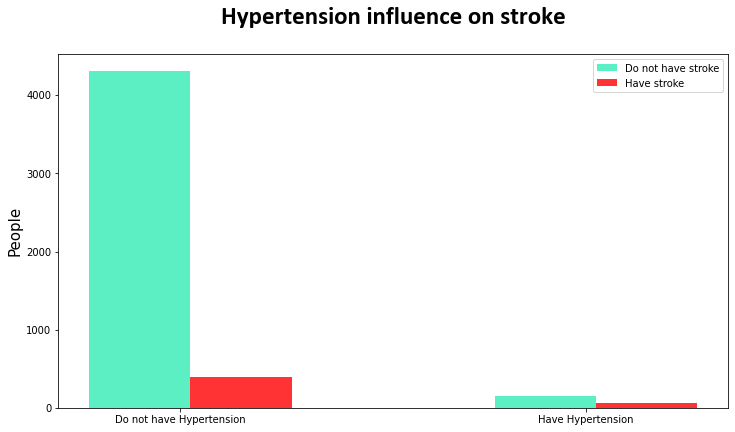

In [32]:
n_groups = 2

# create plot
plt.figure(figsize=(12,6.5))
indexx = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(indexx, HypertensionGroupWithoutStroke, bar_width,
alpha=opacity,
color= palette2[0],
label='Do not have stroke')

rects2 = plt.bar(indexx + bar_width, HypertensionGroupWithStroke, bar_width,
alpha=opacity,
color='#ff0000',
label='Have stroke')

plt.xlabel('', size=15)
plt.ylabel('People',size=15)
plt.title('Hypertension influence on stroke\n',size=25, **hfont)
plt.xticks(indexx + 0.1,('Do not have Hypertension', 'Have Hypertension'))
plt.legend()
plt.savefig("Visualizations\HypertensionInfluenceOnStroke.png")
plt.show()

<p>From the above diagram, it shows that there is an higher risk for people that have Hypertension to have stroke</p>

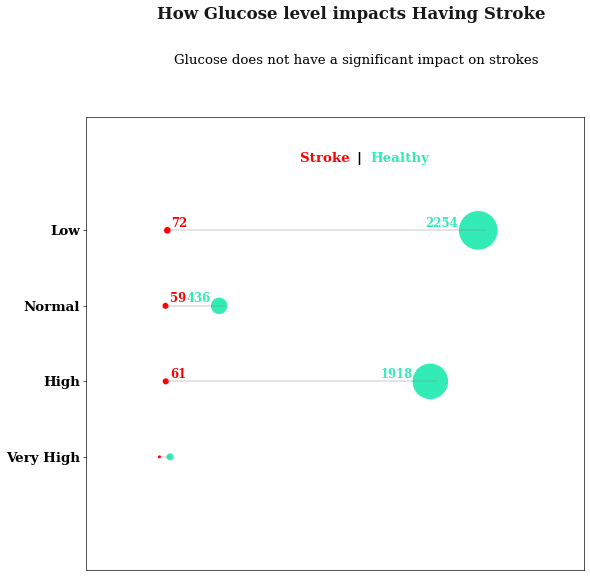

In [33]:
# Let's Visualize those that have Stroke using the Glucose Level Category using a dumbell plot

fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax1 = fig.add_subplot(gs[0:,13:]) #dumbbell plot
stroke_glucose = data[data['stroke'] == 1].glucose_cat.value_counts()
healthy_glucose = data[data['stroke'] == 0].glucose_cat.value_counts()

ax1.hlines(y = ['Very High', 'High', 'Normal', 'Low'], xmin = [18,71,71,89], 
          xmax = [101,1966,478,2316], color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = stroke_glucose.index, x = stroke_glucose.values[[0,2,1,3]], s = stroke_glucose.values[[0,2,1,3]], color = '#ff0000', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_glucose.index, x = healthy_glucose.values[[0,2,1,3]], s = healthy_glucose.values[[0,2,1,3]], color = palette2[0], ax= ax1, alpha = 1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 3000)
ax1.set_ylim(ymin = -1.5,ymax = 4.5)

ax1.set_yticklabels( labels = ['Very High', 'High', 'Normal', 'Low'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(0,5.8, 'How Glucose level impacts Having Stroke' ,{'font': 'Serif', 'Size': '20','weight':'bold', 'color':'black'},alpha = 0.9)
ax1.text(1000,3.9, '\nStroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#ff0000'})
ax1.text(1400,3.9, '\n|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1500,3.9, '\nHealthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':palette2[0]})
ax1.text(120,5., 'Glucose does not have a significant impact on strokes\n', 
        {'font':'Serif', 'size':'16','color': 'black'})

ax1.text(stroke_glucose.values[0] + 30,3.05, stroke_glucose.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#ff0000'})
ax1.text(healthy_glucose.values[0] - 370,3.05, healthy_glucose.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':palette2[0]})

ax1.text(stroke_glucose.values[2] + 30,2.05, stroke_glucose.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#ff0000'})
ax1.text(healthy_glucose.values[2] - 230,2.05, healthy_glucose.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':palette2[0]})

ax1.text(stroke_glucose.values[1] + 30,1.05, stroke_glucose.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#ff0000'})
ax1.text(healthy_glucose.values[1] - 350,1.05, healthy_glucose.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':palette2[0]})
plt.savefig("Visualizations\GlucoseLevelImpactonStroke.png")
plt.show()

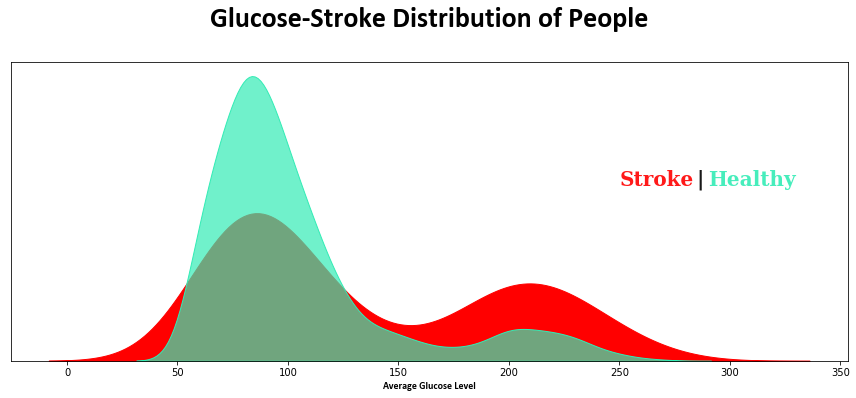

In [34]:
fig = plt.figure(figsize=(15, 5.5))
ax = fig.add_subplot(111)
plt.title('Glucose-Stroke Distribution of People\n', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(250, 0.01, 'Stroke', {'font': 'Serif',
                             'size': '20',
                             'weight': 'bold',
                             'color': '#ff0000'}, alpha=0.9)

ax.text(285, 0.01, '|', {'font': 'Serif',
                       'size': '20',
                       'weight': 'bold',
                       'color': 'black'}, alpha=0.9)

ax.text(290, 0.01, 'Healthy', {'font': 'Serif',
                              'size': '20',
                              'weight': 'bold',
                              'color': palette2[0]}, alpha=0.9)

sns.kdeplot(data=data[data.stroke == 1],
            x='avg_glucose_level', shade=True, ax=ax, color='#ff0000', alpha=1)
sns.kdeplot(data=data[data.stroke == 0],
            x='avg_glucose_level', shade=True, ax=ax, color=palette2[0], alpha=0.7)
plt.xlabel('Average Glucose Level', **hfont)
plt.savefig("Visualizations\GlucoseLevelonStroke.png")
plt.show()

In [35]:
data[data.stroke == 1]

id  gender  age  hypertension  heart_disease ever_married  \
0     9046    Male   67             0              1          Yes   
2    31112    Male   80             0              1          Yes   
3    60182  Female   49             0              0          Yes   
4     1665  Female   79             1              0          Yes   
5    56669    Male   81             0              0          Yes   
..     ...     ...  ...           ...            ...          ...   
243  40460  Female   68             1              1          Yes   
244  17739    Male   57             0              0          Yes   
245  49669  Female   14             0              0           No   
246  27153  Female   75             0              0          Yes   
248  43424  Female   78             0              0          Yes   

         work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          Private          Urban             228.69  36.6  formerly smoked   
2          Private          Rural             105.92  32.5     never smoked   
3          Private          Urban             171.23  34.4           smokes   
4    Self-employed          Rural             174.12  24.0     never smoked   
5          Private          Urban             186.21  29.0  formerly smoked   
..             ...            ...                ...   ...              ...   
243        Private          Urban             247.51  40.5  formerly smoked   
244        Private          Rural              84.96  36.7          Unknown   
245       children          Rural              57.93  30.9          Unknown   
246  Self-employed          Rural              78.80  29.3  formerly smoked   
248        Private          Rural              78.81  19.6          Unknown   

     stroke     bmi_cat     age_cat glucose_cat  
0         1     Obesity     Elderly        High  
2         1     Obesity     Elderly      Normal  
3         1     Obesity  Mid Adults        High  
4         1       Ideal     Elderly        High  
5         1  Overweight     Elderly        High  
..      ...         ...         ...         ...  
243       1     Obesity     Elderly   Very High  
244       1     Obesity  Mid Adults         Low  
245       1     Obesity       Teens         Low  
246       1  Overweight     Elderly         Low  
248       1       Ideal     Elderly         Low  

[209 rows x 15 columns]

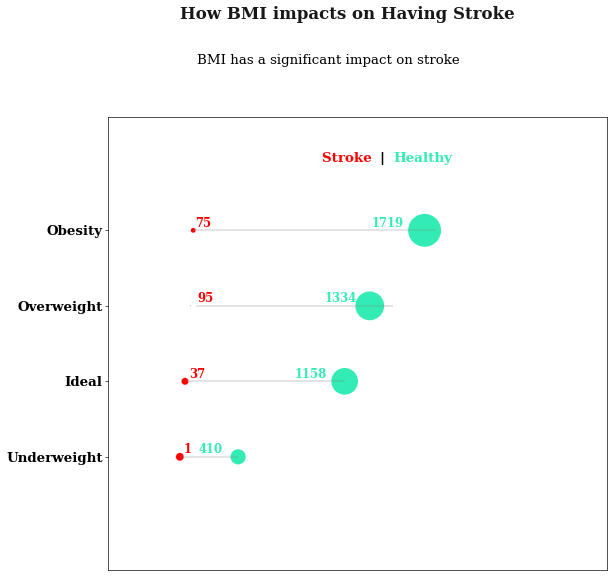

In [36]:
# Let's Visualize those that have Stroke using the BMI Levels Category using a dumbell plot

fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax1 = fig.add_subplot(gs[0:,13:]) #dumbbell plot
stroke_bmi = data[data['stroke'] == 1].bmi_cat.value_counts()
healthy_bmi = data[data['stroke'] == 0].bmi_cat.value_counts()

ax1.hlines(y = ['Underweight','Ideal','Overweight','Obesity'], xmin = [1,37,115,96], 
          xmax = [410,1158,1495,1797], color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = stroke_bmi.index[[3,2,0,1]], x = stroke_bmi.values[[3,2,0,1]], s = stroke_bmi.values, color = '#ff0000', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_bmi.index[[0,1,2,3]], x = healthy_bmi.values[[0,1,2,3]], s = healthy_bmi.values, color = palette2[0], ax= ax1, alpha = 1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 3000)
ax1.set_ylim(ymin = -1.5,ymax = 4.5)

ax1.set_yticklabels( labels = ['Underweight','Ideal','Overweight','Obesity'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(0,5.8, 'How BMI impacts on Having Stroke' ,{'font': 'Serif', 'Size': '20','weight':'bold', 'color':'black'},alpha = 0.9)
ax1.text(1000,3.9, '\nStroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#ff0000'})
ax1.text(1400,3.9, '\n|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1500,3.9, '\nHealthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':palette2[0]})
ax1.text(120,5., 'BMI has a significant impact on stroke\n', 
        {'font':'Serif', 'size':'16','color': 'black'})

ax1.text(stroke_bmi.values[1] + 30,3.05, stroke_bmi.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#ff0000'})
ax1.text(healthy_bmi.values[0] - 370,3.05, healthy_bmi.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':palette2[0]})

ax1.text(stroke_bmi.values[0] + 30,2.05, stroke_bmi.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#ff0000'})
ax1.text(healthy_bmi.values[1] - 320,2.05, healthy_bmi.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':palette2[0]})

ax1.text(stroke_bmi.values[2] + 30,1.05, stroke_bmi.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#ff0000'})
ax1.text(healthy_bmi.values[2] - 350,1.05, healthy_bmi.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':palette2[0]})

ax1.text(stroke_bmi.values[3] + 30,0.05, stroke_bmi.values[3], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#ff0000'})
ax1.text(healthy_bmi.values[3] - 280,0.05, healthy_bmi.values[3], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':palette2[0]})
plt.savefig("Visualizations\BMILevelOnStroke.png")
plt.show()


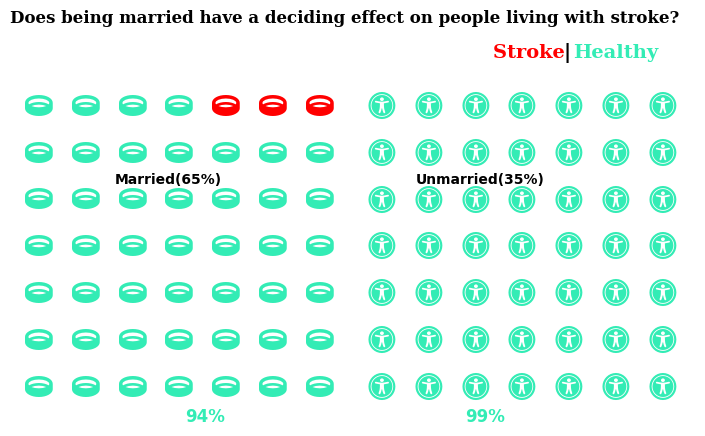

In [37]:
stroke_married = data[data['stroke'] == 1]['ever_married'].value_counts()
healthy_married = data[data['stroke'] == 0]['ever_married'].value_counts()

yes = data['ever_married'].value_counts().values[0]
no =  data['ever_married'].value_counts().values[1]

stroke_no = int(round (stroke_married.values[1] / no * 100, 0))
stroke_yes = int(round( stroke_married.values[0] / yes *100, 0))
healthy_no = int(round(healthy_married.values[1] / no * 100, 0))
healthy_yes = int(round(healthy_married.values[0] / yes *100, 0))

no_per = int(round(no/(no+yes) * 100, 0))
yes_per = int(round(yes/(no+yes)* 100, 0))


fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#fff',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_yes,healthy_yes],
                            'colors' : ['#ff0000',palette2[0]],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'ring',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_no,healthy_no],         
                              'colors' : ['#ff0000',palette2[0]],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'universal-access',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           }
                         },
                   
)
fig.text(0., 0.8, 'Does being married have a deciding effect on people living with stroke?', {'font':'Serif', 'size':12, 'color':'#000', 'weight':'bold'})
fig.text(0.25, 0.23, '{}%'.format(healthy_yes), {'size':12,'weight':'bold' , 'color':palette2[0]}, alpha = 1,)
fig.text(0.65, 0.23, '{}%'.format(healthy_no), {'size':12,'weight':'bold', 'color':palette2[0]}, alpha = 1)
fig.text(0.15, 0.57, 'Married({}%)'.format(yes_per), {'size':10,'weight':'bold' ,'color':'#000'})
fig.text(0.58, 0.57, "Unmarried({}%)".format(no_per), {'size':10,'weight':'bold', 'color':'#000'})
fig.text(0.69,0.75, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '14','weight':'bold','style':'normal', 'color':'#ff0000'})
fig.text(0.79,0.75, '|', {'color':'black' , 'size':'14', 'weight': 'bold'})
fig.text(0.805,0.75, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '14','style':'normal', 'weight':'bold','color':palette2[0]},alpha = 1)
plt.savefig("Visualizations\MarriageDistribution.png")
fig.show()

<p style='font-weight:bold'>Risk of stroke in married people is relatively high<p>

In [38]:
# Work Type

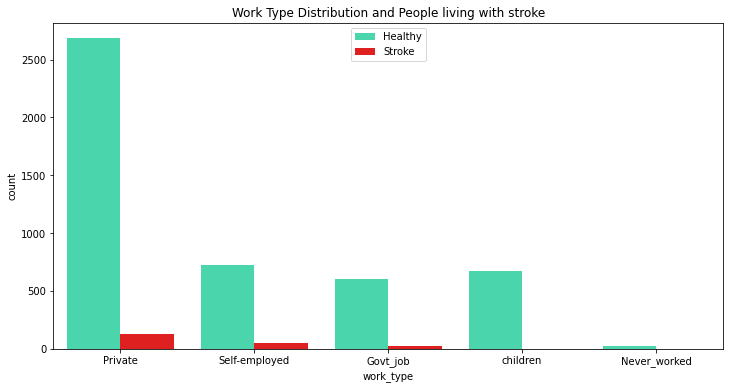

In [39]:
# using countplot to plot for Work Type
plt.figure(figsize = (12,6))
labels=['Healthy','Stroke']
s = sns.countplot(x="work_type", hue="stroke", data=data,palette=palette2)
h,l = s.get_legend_handles_labels()
s.legend(h,labels, title="")
plt.title("Work Type Distribution and People living with stroke",size=12)
plt.savefig("Visualizations\WorkTypeDistribution.png")
plt.show()

In [40]:
# Smoking

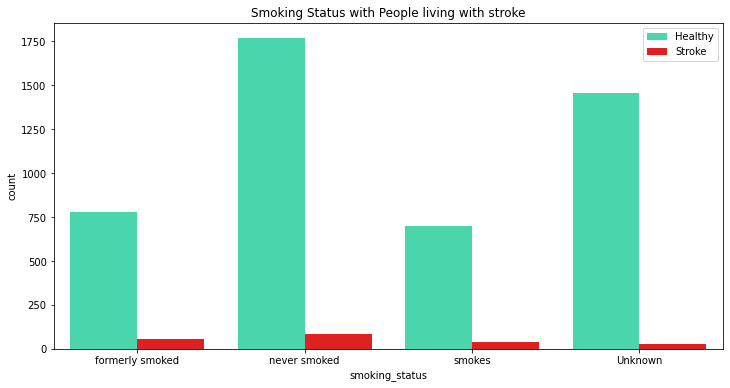

In [41]:
# using countplot to plot for Work Type
plt.figure(figsize = (12,6))
labels=['Healthy','Stroke']
s = sns.countplot(x="smoking_status", hue="stroke", data=data,palette=palette2)
h,l = s.get_legend_handles_labels()
s.legend(h,labels, title="")
plt.title("Smoking Status with People living with stroke",size=12)
plt.savefig("Visualizations\SmokingStatus.png")
plt.show()

# Modelling and Results

In [44]:
data = data.drop(['bmi_cat','age_cat','glucose_cat'],axis='columns')
data = pd.get_dummies(data,drop_first=True)
data.head()

id  age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0   9046   67             0              1             228.69  36.6       1   
2  31112   80             0              1             105.92  32.5       1   
3  60182   49             0              0             171.23  34.4       1   
4   1665   79             1              0             174.12  24.0       1   
5  56669   81             0              0             186.21  29.0       1   

   gender_Male  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0            1                 1                       0                  1   
2            1                 1                       0                  1   
3            0                 1                       0                  1   
4            0                 1                       0                  0   
5            1                 1                       0                  1   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                        0                   0                     1   
2                        0                   0                     0   
3                        0                   0                     1   
4                        1                   0                     0   
5                        0                   0                     1   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
2                               0                            1   
3                               0                            0   
4                               0                            1   
5                               1                            0   

   smoking_status_smokes  
0                      0  
2                      0  
3                      1  
4                      0  
5                      0

In [45]:
X = data.drop(['stroke','id'],axis='columns')
X.head()

age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Male  \
0   67             0              1             228.69  36.6            1   
2   80             0              1             105.92  32.5            1   
3   49             0              0             171.23  34.4            0   
4   79             1              0             174.12  24.0            0   
5   81             0              0             186.21  29.0            1   

   ever_married_Yes  work_type_Never_worked  work_type_Private  \
0                 1                       0                  1   
2                 1                       0                  1   
3                 1                       0                  1   
4                 1                       0                  0   
5                 1                       0                  1   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                        0                   0                     1   
2                        0                   0                     0   
3                        0                   0                     1   
4                        1                   0                     0   
5                        0                   0                     1   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
2                               0                            1   
3                               0                            0   
4                               0                            1   
5                               1                            0   

   smoking_status_smokes  
0                      0  
2                      0  
3                      1  
4                      0  
5                      0

In [46]:
y = data.stroke

In [47]:
X.shape,y.shape

((4908, 15), (4908,))

In [48]:
X.head()

age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Male  \
0   67             0              1             228.69  36.6            1   
2   80             0              1             105.92  32.5            1   
3   49             0              0             171.23  34.4            0   
4   79             1              0             174.12  24.0            0   
5   81             0              0             186.21  29.0            1   

   ever_married_Yes  work_type_Never_worked  work_type_Private  \
0                 1                       0                  1   
2                 1                       0                  1   
3                 1                       0                  1   
4                 1                       0                  0   
5                 1                       0                  1   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                        0                   0                     1   
2                        0                   0                     0   
3                        0                   0                     1   
4                        1                   0                     0   
5                        0                   0                     1   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
2                               0                            1   
3                               0                            0   
4                               0                            1   
5                               1                            0   

   smoking_status_smokes  
0                      0  
2                      0  
3                      1  
4                      0  
5                      0

In [49]:
y[:5]

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

<h3 style='font-weight:bold;color:#000000;text-align:center'>    HYPERPARAMETER TUNING </h2>

In [46]:
#Python Dictionary with 5 supervised models and parameters to choose the best Models and Parameters to use.

model_params = {
    'Decision Tree': {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion':['gini','entropy'],
            'splitter': ['best','random'],
            'max_depth': [10,20,30,100],
            'random_state': [1,2,10]
        }
    },
    'Random_forest':{
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,100],
            'n_jobs': [1,10,20],
            'random_state': [1,2,10]
        }
    },
    'Logistic_regression' :{
        'model' : LogisticRegression(),
        'params': {
            'C': [1,5,10],
            'solver':['liblinear','saga'],
            'multi_class':['auto'],
            'random_state': [1,2,10],
            'penalty': ['l1','l2','elasticnet','none']
        }
    },
    'K_Nearest_Neighbour' :{
        'model' : KNeighborsClassifier(),
        'params' :{
            'n_neighbors': [1,5,10],
            'algorithm': ["auto", "brute", "kd_tree", "ball_tree"],
            'weights': ['uniform','distance'],
            'n_jobs' : [1,10,20]
        }
    },
    'Gradient_Boost': {
        'model': GradientBoostingClassifier(),
        'params' :{
            'learning_rate': [0.01],
            'loss': ['exponential'],
            'max_depth': [50,70], 
            'max_features': [1,2], 
            'n_estimators': [200,300]
        }
    }
}

In [47]:
scores = [] #check list comprehension

for model_name,mp in model_params.items():
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)
    sm = SMOTE(random_state=0)
    X_train,y_train = sm.fit_resample(X_train,y_train)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    rs = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    rs.fit(X_train,y_train)
    scores.append({
        'Model': model_name,
        'Best_Score': rs.best_score_,
        'Best_Parameters':rs.best_params_
    })

In [48]:
pd.options.display.max_colwidth = 200
scoresdf = pd.DataFrame(scores,columns=['Model','Best_Score','Best_Parameters'])
scoresdf.sort_values(by='Best_Score',ascending=False, inplace=True)
scoresdf

Model  Best_Score  \
4       Gradient_Boost    0.956374   
1        Random_forest    0.952251   
3  K_Nearest_Neighbour    0.929505   
0        Decision Tree    0.927110   
2  Logistic_regression    0.858744   

                                                                                           Best_Parameters  
4  {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 70, 'max_features': 2, 'n_estimators': 300}  
1                                                   {'n_estimators': 100, 'n_jobs': 1, 'random_state': 10}  
3                               {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 1, 'weights': 'uniform'}  
0                          {'criterion': 'gini', 'max_depth': 30, 'random_state': 2, 'splitter': 'random'}  
2               {'C': 1, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': 1, 'solver': 'liblinear'}

In [49]:
# The above table shows the Model and Parameters with the best score in a descending order. 
# So we use the Models and the Parameters displayed in our table above for all our algorithms

In [50]:
# Function that accepts (X,y,model_name,model,random_state,Datasplit and parameters per algorithm), the function returns 
# the model score and stores it in model_results.

In [50]:
models_results = {}

def show_model_results(X,y,model_name,model,rand_state,Datasplit=0.2,**kwargs):
    print(f'The model {model_name} with parameters : {kwargs}')
    # Create an object m of the model with parameters entered into the function
    m = model(**kwargs)
    # Split data into training and testing set
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=Datasplit,random_state=rand_state,stratify=y)
    # Create an object of a SMOTE (Oversampling library)
    sm = SMOTE(random_state=0)
    # Performing oversampling on our train set
    X_train,y_train = sm.fit_resample(X_train,y_train)
    # Create an object of our scaling class
    scaler = StandardScaler()
    # Scale our X set
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Model training
    m.fit(X_train,y_train)
    # Get model score
    score = m.score(X_test,y_test)
    # Get model predictions
    prediction = m.predict(X_test)
    # Get model precision score
    model_precision = precision_score(y_test,prediction)
    # Get model recall score
    recall = recall_score(y_test,prediction)
    # Get model F1 score
    F1 = f1_score(y_test,prediction) 
    print('')
    print('***************************************************************')
    print(f'Model name:        \t {model_name}')
    print(f'Model Parameters:  \t {kwargs}')
    print(f'Model Score:       \t {score*100}')
    print(f'Model Precision Score:   {model_precision*100}')
    print(f'Model Recall Score:  \t {recall*100}')
    print(f'Model F1 Score:  \t {F1*100}')
    print('***************************************************************')  
    # Call function plot_confusion matrix
    plot_confusion_matrics(m,X_test,y_test,model_name)
    return score,model_name,F1,model_precision,recall 
# Function to plot our models confusion matrix
def plot_confusion_matrics(model, X_test, y_test,model_name):
    # Get model prediction
    y_pred = model.predict(X_test)
    # confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    # Dataframe to store values
    df_cm = pd.DataFrame(matrix, index = ['Stroke', 'Healthy'],
                                columns = ['Stroke', 'Healthy'])
    plt.figure(figsize = (12,8))
    #plot confusion matrix
    sns.heatmap(df_cm,
                annot=True,
                cmap='Greens',
                fmt='.5g',
                annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
    plt.xlabel('Predicted values', fontsize = 20, **hfont)
    plt.ylabel('True values', fontsize = 20, **hfont)
    plt.savefig(f"Visualizations\{model_name}.png")
    plt.show()

<h2 style='font-weight:bold;color:#ff0000;text-align:center'>    1. RANDOM FOREST CLASSIFIER </h2>

The model Random Forest with parameters : {'n_estimators': 100, 'n_jobs': 1}

***************************************************************
Model name:        	 Random Forest
Model Parameters:  	 {'n_estimators': 100, 'n_jobs': 1}
Model Score:       	 91.34419551934828
Model Precision Score:   10.909090909090908
Model Recall Score:  	 14.285714285714285
Model F1 Score:  	 12.371134020618557
***************************************************************


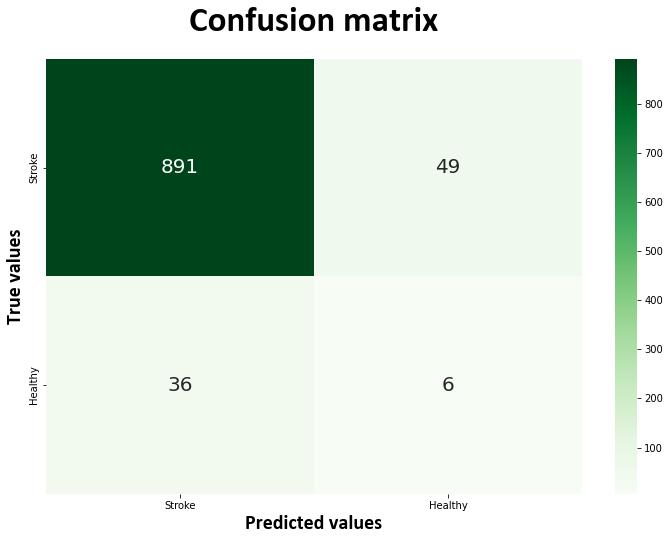

In [51]:
rnd_state = 2
# Call show model result and pass parameters from Hyperparameter tuning
output = show_model_results(X,y,'Random Forest',RandomForestClassifier,n_estimators=100,n_jobs=1,rand_state=rnd_state)
# Save outputs in a dictionary
models_resultsRC = ({
    'Model Name': output[1],
    'Model Score': output[0],
    'F1 Score': output[2],
    'Precision Score': output[3],
    'Recall Score': output[4]
})

<h2 style='font-weight:bold;color:#ff0000;text-align:center'>    2. K NEAREST NEIGHBOURS </h2>

The model KNN with parameters : {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 1, 'weights': 'uniform'}

***************************************************************
Model name:        	 KNN
Model Parameters:  	 {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 1, 'weights': 'uniform'}
Model Score:       	 86.9653767820774
Model Precision Score:   10.909090909090908
Model Recall Score:  	 28.57142857142857
Model F1 Score:  	 15.789473684210526
***************************************************************


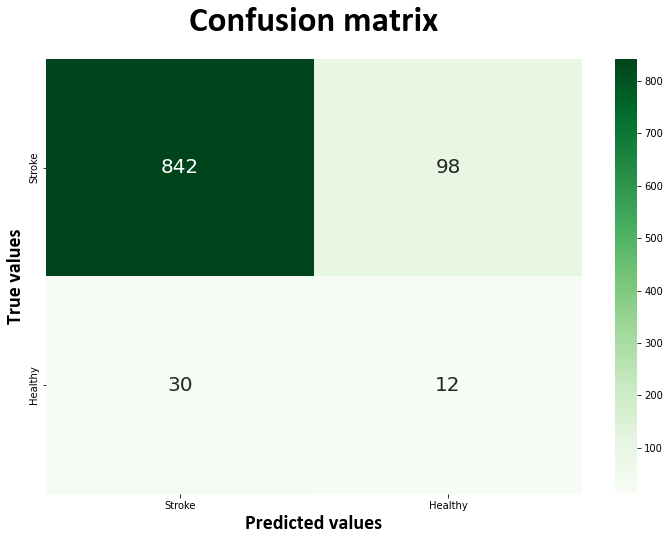

In [52]:
rnd_state = 1
# Call show model result and pass parameters from Hyperparameter tuning
output = show_model_results(X,y,'KNN',KNeighborsClassifier,algorithm='auto',n_jobs=1,n_neighbors= 1,weights='uniform',rand_state=rnd_state)
# Save outputs in a dictionary
models_resultsKN = ({
    'Model Name': output[1],
    'Model Score': output[0],
    'F1 Score': output[2],
    'Precision Score': output[3],
    'Recall Score': output[4]
})

<h2 style='font-weight:bold;color:#ff0000;text-align:center'>    3. Gradient Boost </h2>

The model Gradient Boost with parameters : {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 70, 'max_features': 1, 'n_estimators': 200}

***************************************************************
Model name:        	 Gradient Boost
Model Parameters:  	 {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 70, 'max_features': 1, 'n_estimators': 200}
Model Score:       	 90.93686354378818
Model Precision Score:   7.2727272727272725
Model Recall Score:  	 9.523809523809524
Model F1 Score:  	 8.24742268041237
***************************************************************


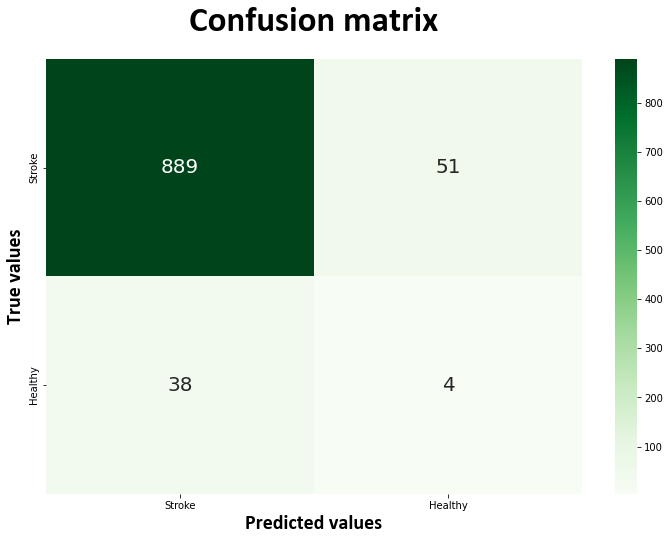

In [53]:
rand_state = 0
# Call show model result and pass parameters from Hyperparameter tuning
output = show_model_results(X, y,'Gradient Boost',GradientBoostingClassifier,learning_rate=0.01,loss='exponential',max_depth=70,max_features=1,n_estimators=200,rand_state=rand_state)
# Save outputs in a dictionary
models_resultsGB = ({
    'Model Name': output[1],
    'Model Score': output[0],
    'F1 Score': output[2],
    'Precision Score': output[3],
    'Recall Score': output[4]
})

<h2 style='font-weight:bold;color:#ff0000;text-align:center'>    4. Decision Tree </h2>

The model Decision Tree with parameters : {'criterion': 'entropy', 'max_depth': 20, 'random_state': 2, 'splitter': 'random'}

***************************************************************
Model name:        	 Decision Tree
Model Parameters:  	 {'criterion': 'entropy', 'max_depth': 20, 'random_state': 2, 'splitter': 'random'}
Model Score:       	 86.86354378818737
Model Precision Score:   9.345794392523365
Model Recall Score:  	 23.809523809523807
Model F1 Score:  	 13.422818791946309
***************************************************************


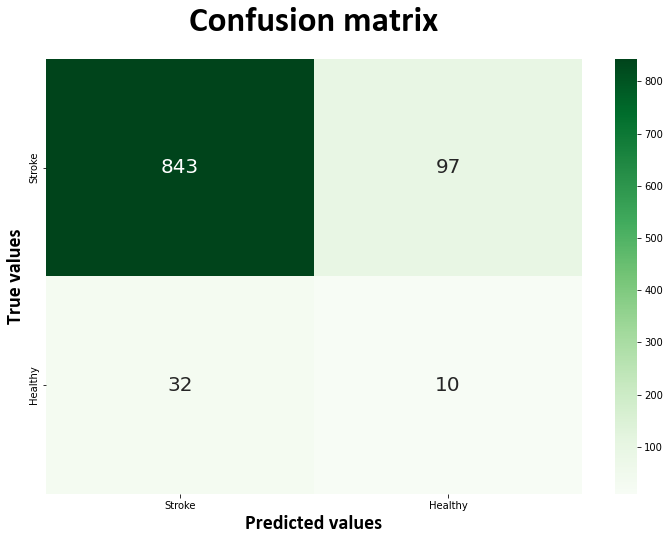

In [54]:
# Call show model result and pass parameters from Hyperparameter tuning
output = show_model_results(X,y,'Decision Tree',DecisionTreeClassifier,10,criterion='entropy',max_depth=20,random_state=2,splitter='random')
# Save outputs in a dictionary
models_resultsDT = ({
    'Model Name': output[1],
    'Model Score': output[0],
    'F1 Score': output[2],
    'Precision Score': output[3],
    'Recall Score': output[4]
})

<h2 style='font-weight:bold;color:#ff0000;text-align:center'>    5. Logistic Regression </h2>

The model Logistic Regression with parameters : {'C': 1, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'saga'}

***************************************************************
Model name:        	 Logistic Regression
Model Parameters:  	 {'C': 1, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'saga'}
Model Score:       	 83.60488798370672
Model Precision Score:   10.06711409395973
Model Recall Score:  	 35.714285714285715
Model F1 Score:  	 15.706806282722512
***************************************************************


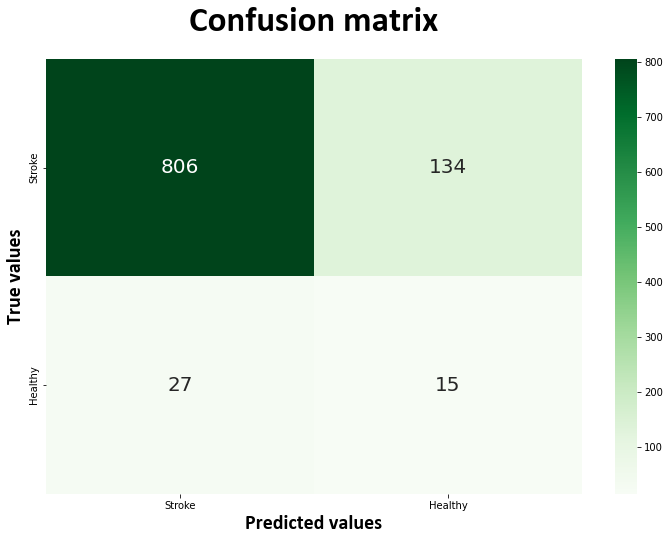

In [55]:
# Call show model result and pass parameters from Hyperparameter tuning
output = show_model_results(X,y,'Logistic Regression',LogisticRegression,2,C=1,multi_class='auto',penalty='none',solver='saga')
# Save outputs in a dictionary
models_resultsLR = ({
    'Model Name': output[1],
    'Model Score': output[0],
    'F1 Score': output[2],
    'Precision Score': output[3],
    'Recall Score': output[4]
})

<h2 style='font-weight:bold;color:#ff0000;text-align:center'>    6. Artificial Neural Network </h2>

In [168]:
sm = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=2,stratify=y)
X_train, y_train = sm.fit_resample(X_train, y_train)
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Creating a Neural Network with 1 input layer and 3 hidden layers with activation function ***RELU*** 
# Then one output layer with ***sigmoid*** function
model = keras.Sequential([
    keras.layers.Flatten(input_dim=X_train.shape[1]),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(125, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])
#Compile our model using Optimizer adam and loss function , 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Model trains for 150 epochs and validates our model on X_test and y_test. 
history = model.fit(X_train, y_train, epochs=150,validation_data=(X_test, y_test),verbose=0)

In [169]:
y_predicted = model.predict(X_test)
y_predicted

array([[9.99879479e-01, 5.42283058e-04],
       [1.00000000e+00, 2.25540669e-10],
       [5.42799234e-02, 4.18436527e-01],
       ...,
       [9.96947706e-01, 5.72471619e-02],
       [1.00000000e+00, 1.26689295e-17],
       [1.00000000e+00, 3.40698151e-29]], dtype=float32)

In [170]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[0, 0, 1, 0, 0]

In [171]:
y_test_labels = [np.argmax(i) for i in y_test]
y_test_labels[:5]

[0, 0, 0, 0, 0]

In [173]:
from sklearn.metrics import classification_report
# Print-Out our classification Report
print(classification_report(y_test_labels,y_predicted_labels))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       940
           1       0.10      0.17      0.12        42

    accuracy                           0.90       982
   macro avg       0.53      0.55      0.54       982
weighted avg       0.92      0.90      0.91       982



In [174]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
# Print f1, precision, and recall scores
preScore = precision_score(y_test_labels,y_predicted_labels, average="macro")
recScore = recall_score(y_test_labels,y_predicted_labels, average="macro")
f1Score = f1_score(y_test_labels,y_predicted_labels, average="macro")
print(f"Precision Score = {preScore}")
print(f"Recall Score = {recScore}")
print(f"F1 Score = {f1Score}")

Precision Score = 0.530086114933288
Recall Score = 0.549290780141844
F1 Score = 0.5352046011961963


Text(69.0, 0.5, 'Truth')

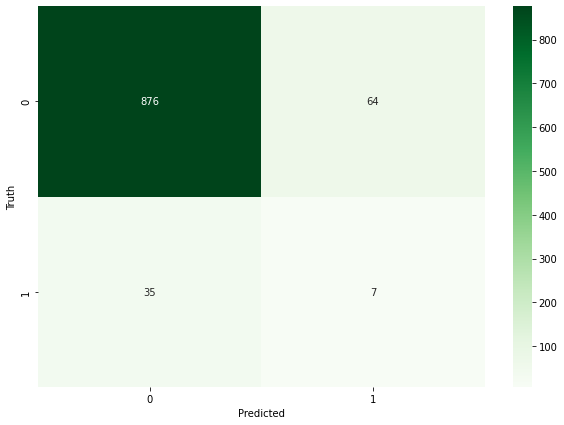

In [175]:
cm = tf.math.confusion_matrix(labels=y_test_labels,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')

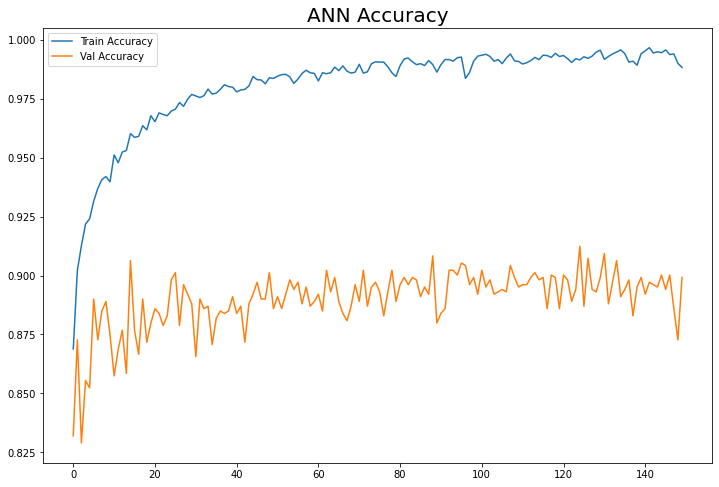

31/31 [==============================] - 0s 1ms/step - loss: 1.2418 - accuracy: 0.8992
Neural Network score     ========>>> 0.899


In [176]:
## Plot History
fig = plt.figure(figsize=(12, 8))
plt.title('ANN Accuracy', size=20)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.savefig("Visualizations\ANNAccuracyGraph.png")
plt.show()
model.evaluate(X_test,y_test)
score = np.round(model.evaluate(X_test, y_test, verbose=0)[1], 3)
print(f'Neural Network score     ========>>> {score}')
models_resultsANN = ({
    'Model Name': 'Artificial Neural Network',
    'Model Score': score,
    'F1 Score': f1Score,
    'Precision Score': preScore,
    'Recall Score': recScore
})

In [177]:
myalgorithms = {
    'Logistic Regression':models_resultsLR,
    'Gradient Boost': models_resultsGB,
    'Decision Tree': models_resultsDT,
    'Random Forest Classifier': models_resultsRC,
    'K Nearest Neighbour': models_resultsKN,
    'Artificial Neural Network': models_resultsANN
}
myalgorithms

{'Logistic Regression': {'Model Name': 'Logistic Regression',
  'Model Score': 0.8360488798370672,
  'F1 Score': 0.15706806282722513,
  'Precision Score': 0.10067114093959731,
  'Recall Score': 0.35714285714285715},
 'Gradient Boost': {'Model Name': 'Gradient Boost',
  'Model Score': 0.9093686354378818,
  'F1 Score': 0.08247422680412371,
  'Precision Score': 0.07272727272727272,
  'Recall Score': 0.09523809523809523},
 'Decision Tree': {'Model Name': 'Decision Tree',
  'Model Score': 0.8686354378818737,
  'F1 Score': 0.1342281879194631,
  'Precision Score': 0.09345794392523364,
  'Recall Score': 0.23809523809523808},
 'Random Forest Classifier': {'Model Name': 'Random Forest',
  'Model Score': 0.9134419551934827,
  'F1 Score': 0.12371134020618557,
  'Precision Score': 0.10909090909090909,
  'Recall Score': 0.14285714285714285},
 'K Nearest Neighbour': {'Model Name': 'KNN',
  'Model Score': 0.869653767820774,
  'F1 Score': 0.15789473684210525,
  'Precision Score': 0.10909090909090909,
 

In [178]:
myalgorithmsdf = pd.DataFrame(myalgorithms.values(),columns=['Model Name','Model Score','F1 Score','Precision Score','Recall Score'])
myalgorithmsdf.sort_values(by='Model Score',ascending=False, inplace=True)
myalgorithmsdf

Model Name  Model Score  F1 Score  Precision Score  \
3              Random Forest     0.913442  0.123711         0.109091   
1             Gradient Boost     0.909369  0.082474         0.072727   
5  Artificial Neural Network     0.899000  0.535205         0.530086   
4                        KNN     0.869654  0.157895         0.109091   
2              Decision Tree     0.868635  0.134228         0.093458   
0        Logistic Regression     0.836049  0.157068         0.100671   

   Recall Score  
3      0.142857  
1      0.095238  
5      0.549291  
4      0.285714  
2      0.238095  
0      0.357143

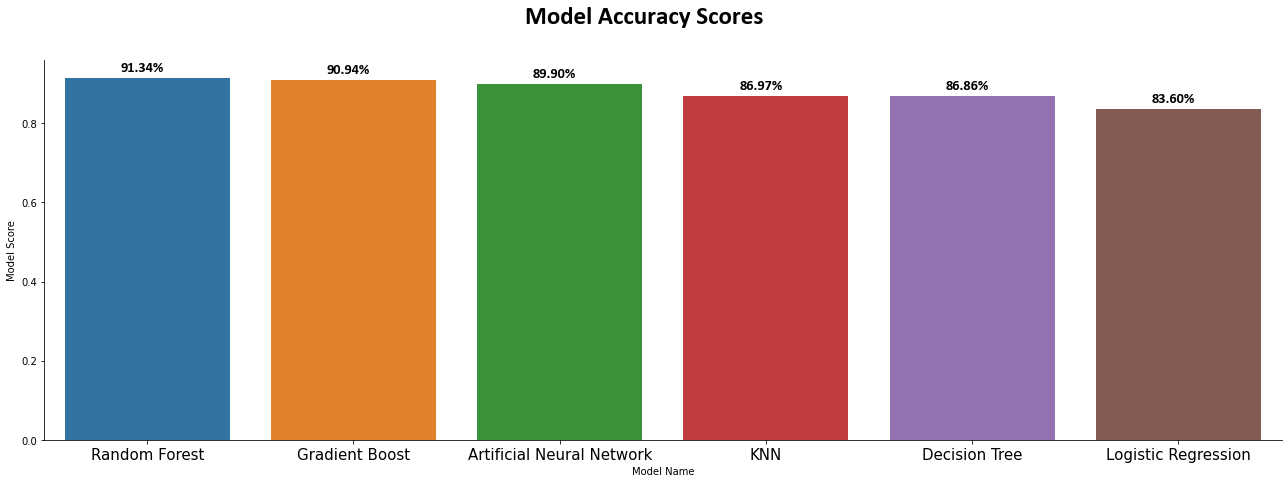

In [179]:
g = sns.catplot(x='Model Name', y='Model Score', data=myalgorithmsdf,
                height=6, aspect=3, kind='bar', legend=True)
g.fig.suptitle('Model Accuracy Scores', size=25, y=1.1, **hfont)
ax = g.facet_axis(0,0)
ax.tick_params(axis='x', which='major', labelsize=15)
for p in ax.patches:
    ax.text(p.get_x() + 0.27,
            p.get_height() * 1.02,
           '{0:.2f}%'.format(p.get_height()*100),
            color='black',
            rotation='horizontal',
            size='x-large', **hfont)
plt.savefig("Visualizations\ModelAccuracy.png")

In [180]:
# From the above diagram, it shows that Random Forest is the best model to use for the prediction.

<h2 style='font-weight:bold;color:#ff0000;text-align:center'>    SHAP </h2>

In [181]:
import shap

#### SHAP with RandomForestClassifier

In [183]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
sm = SMOTE(random_state=0)
X_train,y_train = sm.fit_resample(X_train,y_train)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [190]:
# Random Forest Feature Importance

***Random Forest***


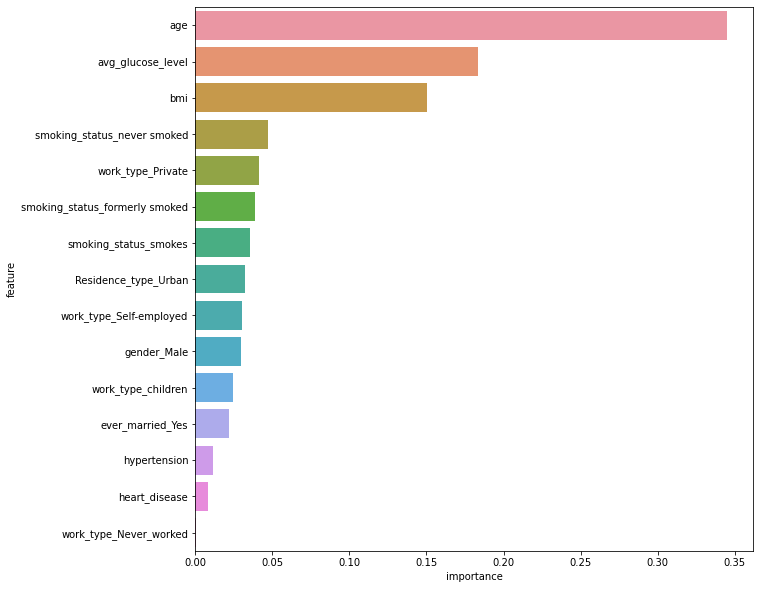

In [185]:
RFModel = RandomForestClassifier(n_estimators=100,n_jobs=1)
RFModel.fit(X_train,y_train)
feature_importance_df = pd.DataFrame()
feature_importance_df['feature'] = X.columns
feature_importance_df['importance'] = RFModel.feature_importances_

feature_importance_df = feature_importance_df.sort_values('importance',ascending=False).reset_index()
print('***Random Forest***')
plt.figure(figsize=(10,10))
sns.barplot(x='importance',y='feature',data=feature_importance_df[:15])
plt.savefig("Visualizations\ShapValueRandomForest.png")
plt.show()

Explainer Expected Value: [0.50111998 0.49888002]


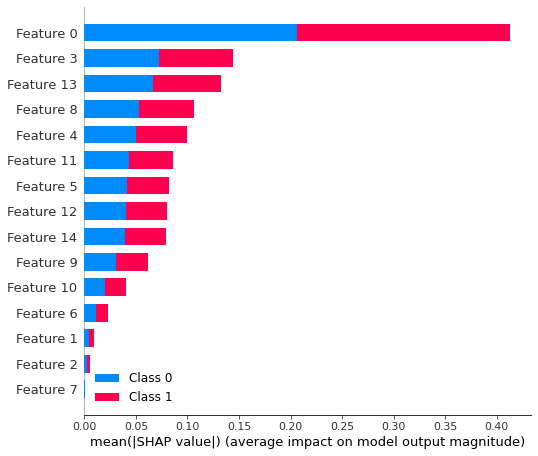

<Figure size 432x288 with 0 Axes>

In [191]:
#Initialize SHAP Tree Explainer
explainer = shap.TreeExplainer(RFModel,model_output='margin')
shap_values = explainer.shap_values(X_test)

#Baseline Value
expected_value = explainer.expected_value
if isinstance(expected_value,list):
    expected_value = expected_value[1]

print(f'Explainer Expected Value: {expected_value}')
shap.summary_plot(shap_values,X_test) 

In [ ]:
# Gradient Boost Feature Importance

***Gradient Boost***


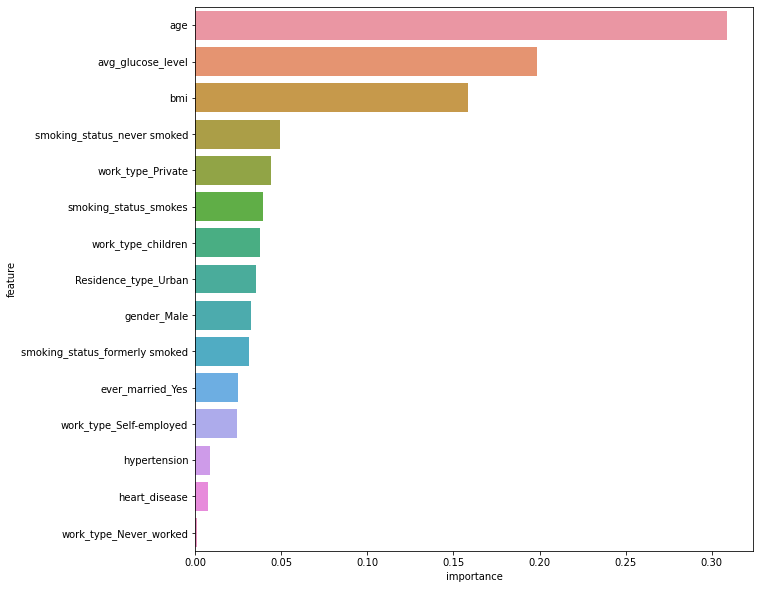

In [193]:
GBModel = GradientBoostingClassifier(learning_rate=0.01,loss='exponential',max_depth= 50,max_features=1,n_estimators=200)
GBModel.fit(X_train,y_train)
feature_importance_df = pd.DataFrame()
feature_importance_df['feature'] = X.columns
feature_importance_df['importance'] = GBModel.feature_importances_

feature_importance_df = feature_importance_df.sort_values('importance',ascending=False).reset_index()
print('***Gradient Boost***')
plt.figure(figsize=(10,10))
sns.barplot(x='importance',y='feature',data=feature_importance_df[:15])
plt.savefig("Visualizations\ShapValueGradientBoost.png")
plt.show()

Explainer Expected Value: [8.28089334e-18]


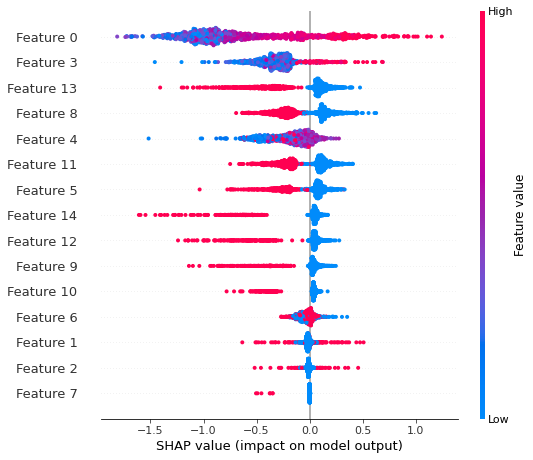

<Figure size 432x288 with 0 Axes>

In [194]:
#Initialize SHAP Tree Explainer
explainer = shap.TreeExplainer(GBModel,model_output='margin')
shap_values = explainer.shap_values(X_test)

#Baseline Value
expected_value = explainer.expected_value
if isinstance(expected_value,list):
    expected_value = expected_value[1]

print(f'Explainer Expected Value: {expected_value}')
shap.summary_plot(shap_values,X_test) 